In [1]:
import pandas as pd
yoy_dir = "~/Projects/strategy-evaluator/output/yoy"
algorithm = "random"

In [2]:
df = pd.read_csv(f"{yoy_dir}/yoy_{algorithm}.csv", delimiter=',', index_col=0)
df = df.sort_values(by='year') # sort from least recent to most recent year
df = df.drop(df.index[-1]) # current year is not complete
display(df)

,performance,ups,downs,limits
year,,,,
1962,0.466329,1288,1474,1179
1963,0.527273,986,884,1889
1964,0.588714,1158,809,1841
1965,0.599436,1275,852,1884
1966,0.487879,1449,1521,1062
...,...,...,...,...
2018,0.459460,53914,63428,31327
2019,0.549125,59630,48961,40193
2020,0.490798,67363,69889,14639


In [3]:
df_pruned = df.loc[df.index > 1980]
display(df_pruned)

,performance,ups,downs,limits
year,,,,
1981,0.525414,13831,12493,5425
1982,0.552591,15824,12812,5492
1983,0.557867,16061,12729,6956
1984,0.503621,16688,16448,9647
1985,0.560886,31588,24730,21773
1986,0.522594,34856,31842,15603
1987,0.488475,35710,37395,13043
1988,0.509626,33327,32068,23034
1989,0.551171,34597,28173,26503


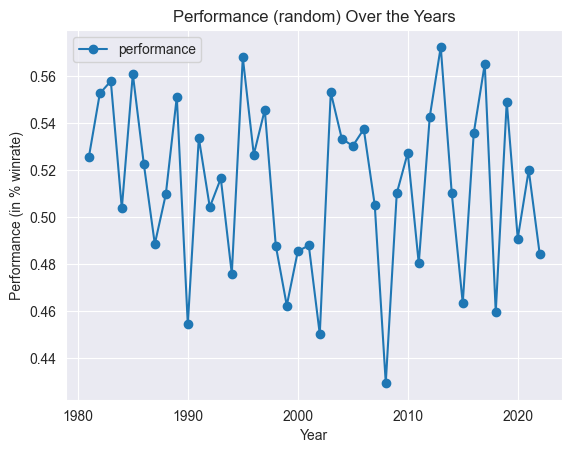

In [4]:
import matplotlib.pyplot as plt

# Plot the performance column against the year column
df_pruned.plot(y='performance', marker='o')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Performance (in % winrate)')
plt.title(f'Performance ({algorithm}) Over the Years')

# Show the plot
plt.show()

In [5]:
import numpy as np
from scipy import stats
years = np.array(df_pruned.index)
values = np.array(df_pruned["performance"].values)

slope, intercept, r_value, p_value, std_err = stats.linregress(years, values)

print("Random YoY")
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-value (correlation coefficient): {r_value:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Standard error: {std_err:.4f}")

Random YoY
Slope: -0.0004
Intercept: 1.3143
R-value (correlation coefficient): -0.1360
P-value: 0.3904
Standard error: 0.0005


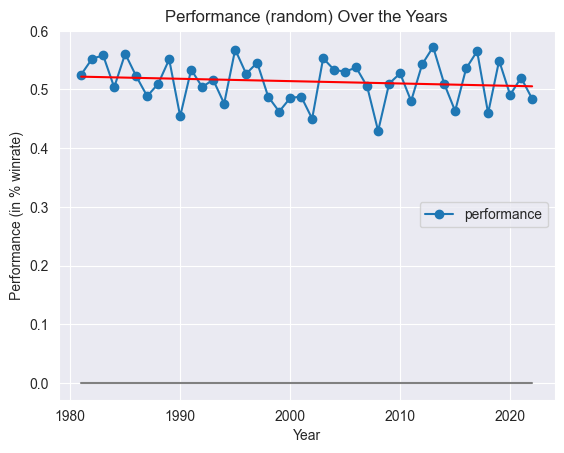

In [6]:
# Plot the DataFrame
df_pruned.plot(y='performance', marker='o')
plt.xlabel('Year')
plt.ylabel('Performance (in % winrate)')
plt.title(f'Performance ({algorithm}) Over the Years')

# Plot the regression line
regression_line = slope * years + intercept
plt.plot(years, regression_line, color='red')
plt.plot(years, 0 * years, color='gray')
plt.savefig(f"./figures/yoy_perf_{algorithm}.svg", format="svg")

# Display the plot
plt.show()